## Ćwiczenie 4 (1 pkt)

Napisać klasę CoinMAP (Maximum A Posteriori) posiadającą metody fit i toss:
- konstruktor - przyjmuje prior, który może np. być słownikiem (klucz - $\theta$, wartość - jej prawdopodobieństwo a priori),
- fit - przyjmuje listę obserwacji i uaktualnia self.knowledge, korzystając ze wzoru Bayesa, a następnie ustawia self.theta wybierając odpowiednią wartość z self.knowledge,
- toss - generuje jeden rzut monetą z prawdopodobieństwem self.theta i zwraca 0 lub 1.

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy import random, linalg
%matplotlib inline 

class CoinMAP(object):
    def __init__(self, prior):
        self.knowledge = prior
        self.theta = max(self.knowledge.items(), key=lambda th:th[1])[0]
          
    def fit(self, X):
        ones = sum(X)
        zeros = len(X) - sum(X)
        value_x = 0
        for key, value in self.knowledge.items():
            value_x += value * key ** ones * (1 - key) ** zeros 
        for key, value in self.knowledge.items():
            self.knowledge[key] = (value * key ** ones * (1 - key) ** zeros) / value_x
        self.theta = max(self.knowledge.items(), key=lambda key:key[1])[0]
    
    def toss(self):
        if (self.theta == None):
            return print("Fit the model first.")
        x = random.random()
        if x < self.theta:
            return 1
        else:
            return 0
        
model = CoinMAP({0.5: 0.8, 0.6: 0.2})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print("model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}")
print(model.knowledge)
print("Powinno wyjść 0.5:" + str(model.theta))
print("Powinno wyjść 1:" + str(sum(model.knowledge.values())))

model = CoinMAP({0.5: 0.5, 0.6: 0.2, 0.8: 0.3})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print("model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}")
print(model.knowledge)
print("Powinno wyjść 0.8:" + str(model.theta))
print("Powinno wyjść 1:" + str(sum(model.knowledge.values())))

model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}
{0.5: 0.68556676315468579, 0.6: 0.31443323684531421}
Powinno wyjść 0.5:0.5
Powinno wyjść 1:1.0
model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}
{0.5: 0.36171237227008995, 0.6: 0.26543735345984282, 0.8: 0.37285027427006717}
Powinno wyjść 0.8:0.8
Powinno wyjść 1:1.0


## Ćwiczenie 5 (2 pkt)

Napisać klasę CoinBest, która działa jak CoinMAP z tą różnicą, że self.theta jest obliczane powyższym wzorem, a nie wybierane spośród wartości self.knowledge.

In [2]:
class CoinBest(object):
    def __init__(self, prior):
        self.knowledge = prior
        self.theta = max(self.knowledge)
        
    def fit(self, X):
        ones = sum(X)
        zeros = len(X) - sum(X)
        value_x = 0
        for key, value in self.knowledge.items():
            value_x += value * key ** ones * (1 - key) ** zeros 
        for key, value in self.knowledge.items():
            self.knowledge[key] = (value * key ** ones * (1 - key) ** zeros) / value_x
        nsum = 0
        for key in self.knowledge:
                nsum += key * self.knowledge[key]
        self.theta = nsum

    def toss(self):
        if (self.theta == None):
            return print("Fit the model first.")
        x = random.random()
        if x < self.theta:
            return 1
        else:
            return 0
        
model = CoinBest({0.5: 0.8, 0.6: 0.2})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print("model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}")
print(model.knowledge)
print("Powinno wyjść około 0.53:", model.theta)
print("Powinno wyjść 1:", sum(model.knowledge.values()))

model = CoinBest({0.5: 0.5, 0.6: 0.2, 0.8: 0.3})
model.fit(np.array([1,0,1,1,1,0,0,1,1,1]))
print("model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}")
print(model.knowledge)
print("Powinno wyjść około 0.64:", model.theta)
print("Powinno wyjść 1:", sum(model.knowledge.values()))

model.knowledge powinno wyjść {0.5: 0.686, 0.6: 0.314}
{0.5: 0.68556676315468579, 0.6: 0.31443323684531421}
Powinno wyjść około 0.53: 0.531443323685
Powinno wyjść 1: 1.0
model.knowledge powinno wyjść {0.5: 0.362, 0.6: 0.265, 0.8: 0.373}
{0.5: 0.36171237227008995, 0.6: 0.26543735345984282, 0.8: 0.37285027427006717}
Powinno wyjść około 0.64: 0.638398817627
Powinno wyjść 1: 1.0


## Ćwiczenie 6 (1 pkt)

Zasymulować metodą Monte Carlo przebieg rozgrywki dla gracza, który:
- nie zmienia bramki,
- zawsze zmienia bramkę,

w przypadku:
- zwykłym,
- z piorunem, a jeśli trafi w nagrodę to:
    - powtórka,
    - przegrana.

Wypisać średnią wygraną.

In [3]:
from random import randint
def game():
    gates = [0,1,2]
    prize = randint(0,2)  
    selected_gate = randint(0,2)
    gates.remove(selected_gate)

    if(selected_gate != prize):
        n_another_gate = prize
    else:
        n_another_gate = gates[randint(0,1)]
    
    gates = [0,1,2]
    gates.remove(selected_gate)
    lightning = gates[randint(0,1)]
    gates.remove(lightning)
    l_another_gate = gates[0]
    return selected_gate, n_another_gate, l_another_gate, lightning, prize
    
def play(mode):
    selected_gate, n_another_gate, l_another_gate, lightning, prize = game()     
    if mode == 0 and selected_gate == prize:
        return 1
    elif mode == 0 and selected_gate != prize:
        return 0
    elif mode == 1 and n_another_gate == prize:
        return 1
    elif mode == 1 and n_another_gate != prize:
        return 0
    elif mode == 2 and lightning == prize:
        return 0
    elif mode == 2 and selected_gate == prize:
        return 1
    elif mode == 2 and selected_gate != prize:
        return 0   
    elif mode == 3 and l_another_gate == prize:
        return 1
    elif mode == 3 and l_another_gate != prize:
        return 0
    elif mode == 4 and lightning == prize:
        selected_gate, n_another_gate, l_another_gate, lightning, prize = game()
        if selected_gate == prize:
            return 1
        else:
            return 0 
    elif mode == 4 and selected_gate == prize:
        return 1
    elif mode == 4 and selected_gate != prize and lightning != prize:
        return 0
    elif mode == 5 and lightning == prize:
        selected_gate, n_another_gate, l_another_gate, lightning, prize = game()
        if l_another_gate == prize:
            return 1
        else:
            return 0 
    elif mode == 5 and l_another_gate == prize:
        return 1
    elif mode == 5 and l_another_gate != prize and lightning != prize:
        return 0
    
rounds = 10000

results = []
for r in range(rounds):
    results.append(play(mode=0))
print("Normal game, selected gate: " + str(sum(results)/rounds) + " ~1/3")

results = []
for r in range(rounds):
    results.append(play(mode=4))
print("Game with lightning, selected gate, with replay: " + str(sum(results)/rounds) + " ~1/2")

results = []
for r in range(rounds):
    results.append(play(mode=2))
print("Game with lightning, selected gate: " + str(sum(results)/rounds) + " ~1/3")

results = []
for r in range(rounds):
    results.append(play(mode=1))
print("Normal game, another gate: " + str(sum(results)/rounds) + " ~2/3")

results = []
for r in range(rounds):
    results.append(play(mode=5))
print("Game with lightning, another gate, with replay: " + str(sum(results)/rounds) + " ~1/2")

results = []
for r in range(rounds):
    results.append(play(mode=3))
print("Game with lightning, another gate: " + str(sum(results)/rounds) + " ~1/3")



# spodziewany wynik:
#  - bez zmiany bramki:
#     - zwykły: 1/3
#     - piorun z powtórką: 1/2
#     - piorun z przegraną: 1/3
#  - ze zmianą bramki:
#     - zwykły: 2/3
#     - piorun z powtórką: 1/2
#     - piorun z przegraną: 1/3

Normal game, selected gate: 0.3339 ~1/3
Game with lightning, selected gate, with replay: 0.4381 ~1/2
Game with lightning, selected gate: 0.3329 ~1/3
Normal game, another gate: 0.6665 ~2/3
Game with lightning, another gate, with replay: 0.4482 ~1/2
Game with lightning, another gate: 0.3371 ~1/3


## Ćwiczenie 7 (1 pkt)

Losujemy $k=100$ razy liczbę od $1$ do $m=200$ z rozkładem jednostajnym. Ile średnio różnych liczb wylosujemy?
Rozwiązać metodą Monte Carlo.

https://math.dartmouth.edu/archive/m19w03/public_html/Section6-5.pdf - czy wynik zgadza się z tw. 6.14?


In [4]:
def MC(k, m, nb_simulations):
    integers = []
    for s in range(nb_simulations):
        int_set = []
        for i in range(k):
            new = randint(1,m)
            if new not in int_set:
                int_set.append(new)
        integers.append(len(int_set))
    avg_nb_integers = sum(integers) / len(integers)
    return avg_nb_integers

k = 100
m = 200
print(str(MC(k, m, nb_simulations=30)) + "=?=" + str(m - (m * (1 - 1/float(m))**k)))

78.66666666666667=?=78.84591270185442


## Ćwiczenie 8 (2 pkt)

Napisać funkcję, która przyjmuje parametry rozkładu normalnego: średnią oraz macierz kowariancji, liczbę sampli, a następnie sampluje punkty z tego rozkładu i rysuje na plaszczyźnie. Ponadto na rysunku należy zaznaczyć strzałkami wektory własne macierzy kowariancji (punkt zaczepienia to średnia rozkładu normalnego) i wypisać odpowiadające im wartości własne.

Narysować powyższe dla kilku różnych losowo wybranych średnich i macierzy kowariancji (http://stackoverflow.com/questions/619335/a-simple-algorithm-for-generating-positive-semidefinite-matrices).


wartosci wlasne: [ 0.01092803  0.9387361 ]


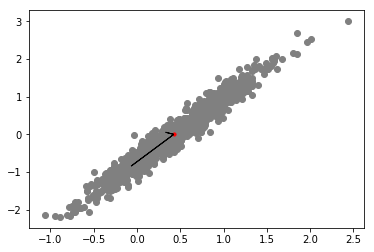

wartosci wlasne: [ 1.2049478   0.22872082]


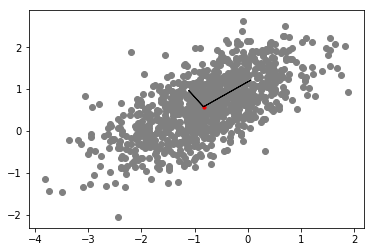

In [5]:
def random_cov_matrix(size):
    A = np.random.rand(size,size)
    return np.dot(A,A.transpose())

def sampling(mean, cov, numb):
    x = np.random.multivariate_normal(mean, cov, numb)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    w, v = np.linalg.eig(cov)
    print("wartosci wlasne:", w)
    plt.scatter(x[:, 0],x[:, 1],c="grey")
    plt.scatter(mean[0],mean[1],c="red", alpha=1, s=10)
    
    plt.arrow(mean[0], mean[1], w[0]**0.5*v[0][0], w[0]**0.5*v[1][0])
    plt.arrow(mean[0], mean[1], w[1]**0.5*v[0][1], w[1]**0.5*v[1][1])
    plt.show()
    
numb = 1000
mean = np.random.uniform(-1, 1, size=2)
cov = random_cov_matrix(size=2)
sampling(mean, cov, numb)

mean = np.random.uniform(-1, 1, size=2)
cov = random_cov_matrix(size=2)
sampling(mean, cov, numb)

## Ćwiczenie 9 (4 pkt)

Załóżmy, że mamy dane pochodzące dwuwymiarowego rozkładu normalnego o macierzy kowariancji będącej identycznością i średniej $\mu$. Będziemy estymowali $\mu$ korzystając z wzoru Bayesa.

1. Stworzyć siatkę 100x100 na kwadracie $[0,1]^2$ - to będą nasze potencjalne średnie.
2. Wylosować jeden punkt z siatki - to będzie "prawdziwa" średnia rozkładu. Oczywiście model jej nie zna.
3. Przyjąć jednostajny rozkład a priori (użyć floatów z największą możliwą precyzją), trzymać go w tablicy knowledge.
4. Powtórzyć nb_iters razy:
    - wygenerować nb_samples sampli z prawdziwego rozkładu,
    - uaktualnić knowledge na podstawie obserwacji,
    - narysować knowledge jako dwuwymiarowy heatmap.
Sprawdzić, co się stanie, gdy:
1. Siatka punktów będzie rzadsza, a prawdziwa średnia rozkładu będzie poza siatką.
2. Średnia rozkładu znajdzie się całkowicie poza badanym kwadratem, np. w punkcie $(1.2, 0.7)$.
3. Na początku wylosujemy 2 punkty z siatki - $\mu_1$ i $\mu_2$ - a następnie obserwacje będziemy samplować naprzemian z dwóch rozkładów gaussa, przy czym cały czas estymujemy $\mu$ tak, jak gdyby istniało dokładnie jedno prawdziwe.

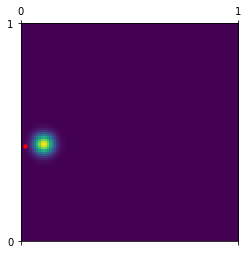

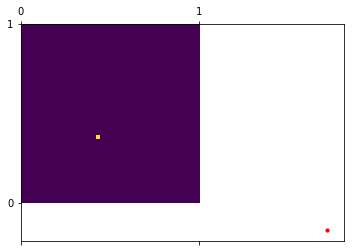

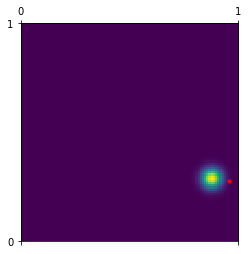

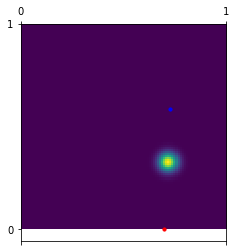

In [6]:
import math
from functools import reduce

N = 100
nb_iters = 5
nb_samples = 100
cov = [[1,0],[0,1]]
#1
x, y = np.meshgrid(np.linspace(0,1,N), np.linspace(0,1,N))
grid = np.array([x.flatten(), y.flatten()]).T
#2
mean = grid[random.randint(0, N*N-1)]

def estimate(N, nb_iters, nb_samples, cov, grid, mean):
    #3
    knowledge = np.full(N*N, 1.0/N*N)
    #4
    for i in range(nb_iters):
        #4.1)
        samples = list(random.multivariate_normal(mean, cov, nb_samples))
        #4.2)
        for j in range(N*N):
            m = grid[j]
            exps = (math.exp((-(s[0]-m[0])**2-(s[1]-m[1])**2)) for s in samples)
            knowledge[j] *= reduce(lambda x,y:x*y, exps) 
        knowledge /= np.sum(knowledge)
    return knowledge
    
#4.3)
def plot(heatmap, mean, N):
    fig, ax1 = plt.subplots(1,1)
    ax1.matshow(np.array(heatmap.reshape(N,N)), extent=[0,1,0,1])
    ax1.scatter(mean[0], 1 - mean[1],c="red", alpha=1, s=10)
    plt.show()

knowledge = estimate(N, nb_iters, nb_samples, cov, grid, mean)
plot(knowledge, mean, N)
#5
N = 50
x, y = np.meshgrid(np.linspace(0,1,N), np.linspace(0,1,N))
mean = grid[random.randint(0, N*N-1)]
mean[0] += 1
mean[1] += 1
knowledge = estimate(N, nb_iters, nb_samples, cov, grid, mean)
plot(knowledge, mean, N)
#6
N = 100
x, y = np.meshgrid(np.linspace(0,1,N), np.linspace(0,1,N))
grid = np.array([x.flatten(), y.flatten()]).T
#here enter mean 
mean = grid[random.randint(0, N*N-1)]
knowledge = estimate(N, nb_iters, nb_samples, cov, grid, mean)
plot(knowledge, mean, N)
#7
def estimate3(N, nb_iters, nb_samples, cov, grid, mean1, mean2):
    knowledge = np.full(N*N, 1.0/N*N)
    flag = False
    for i in range(nb_iters):
        if flag:
            samples = list(random.multivariate_normal(mean1, cov, nb_samples))
            flag = False
        else:
            samples = list(random.multivariate_normal(mean2, cov, nb_samples))
            flag = True
        
        for j in range(N*N):
            m = grid[j]
            exps = (math.exp((-(s[0]-m[0])**2-(s[1]-m[1])**2)) for s in samples)
            knowledge[j] *= reduce(lambda x,y:x*y, exps) 
        knowledge /= np.sum(knowledge)
    return knowledge

def estimate2(N, nb_iters, nb_samples, cov, grid, mean1, mean2):
    knowledge = np.full(N*N, 1.0/N*N)
    for i in range(nb_iters):
        samples = []
        for n in range(int(nb_samples/2)):
            samples += list(random.multivariate_normal(mean1, cov, 1))
            samples += list(random.multivariate_normal(mean2, cov, 1))
        
        for j in range(N*N):
            m = grid[j]
            exps = (math.exp((-(s[0]-m[0])**2-(s[1]-m[1])**2)) for s in samples)
            knowledge[j] *= reduce(lambda x,y:x*y, exps) 
        knowledge /= np.sum(knowledge)
    return knowledge

def plot2(heatmap, mean1, mean2, N):
    fig, ax1 = plt.subplots(1,1)
    ax1.matshow(np.array(heatmap.reshape(N,N)), extent=[0,1,0,1])
    ax1.scatter(mean1[0], 1 - mean1[1],c="red", alpha=1, s=10)
    ax1.scatter(mean2[0], 1 - mean2[1],c="blue", alpha=1, s=10)
    plt.show()


mean1 = grid[random.randint(0, N*N-1)]
mean2 = grid[random.randint(0, N*N-1)]
knowledge = estimate2(N, nb_iters, nb_samples, cov, grid, mean1, mean2)
plot2(knowledge, mean1, mean2, N)

## Ćwiczenie 10 (4 pkt)
(proszę najpierw przeczytać uwagę dodaną na czerwono w sekcji "Podejście maximum likelihood")

Zdarzenie oznaczone $B_1$: Rzucamy dziesięć razy monetą i otrzymujemy wyniki ORZEŁ, ORZEŁ, RESZKA, RESZKA, ORZEŁ, RESZKA, ORZEŁ, ORZEŁ, ORZEŁ, ORZEŁ.

Zdarzenie oznaczone $B_2$: Poprosiliśmy kolegę, żeby w naszym imieniu rzucił 10 razy monetą i zanotował wyniki. Kolega - w dobrej wierze - zliczał tylko liczbę orłów, wypadło ich 7.

Udowodnić (matematycznie), że dla dowolnego rozkładu a priori parametru $\theta$ zachodzi równość rozkładów a posteriori:
$$P(\theta\mid B_1) = P(\theta\mid B_2)$$
Innymi słowy, kolejność wyników rzutu monetą faktycznie nie niesie za sobą żadnej informacji, która jest przydatna przy estymowaniu parametru $\theta$.

$$P(\theta\mid B_1) = P(\theta\mid B_2)$$
$$P(\theta\mid B_1) = \frac{P(B_1\mid \theta)\,P(\theta)}{P(B_1)}$$$$P(\theta\mid B_2) = \frac{P(B_2\mid \theta)\,P(\theta)}{P(B_2)}$$
$$ \frac{P(B_1\mid \theta)\,P(\theta)}{P(B_1)} = \frac{P(B_2\mid \theta)\,P(\theta)}{P(B_2)}$$
$$ \dfrac{(\theta^{7}(1-\theta)^{3})\cdot P(\theta)}{P(B_1)} = \dfrac{120 *(\theta^{7}(1-\theta)^{3})\cdot P(\theta)}{P(B_1)*120}$$
$$ \frac{P(B_1\mid \theta)}{P(B_1)} = \frac{120 * P(B_1\mid \theta)}{P(B_1)*120}$$
$$ \frac{P(B_1\mid \theta)}{P(B_1)} = \frac{P(B_1\mid \theta)}{P(B_1)}$$
